# Classical Runge-Kutta Method
The *decision vector* of variables is given by
$$
\pmb{z}^\intercal = [\pmb{s}_1, \pmb{c}_1, \bar{\pmb{c}}_2,
\dots,
\bar{\pmb{c}}_M, \pmb{s}_M, \pmb{c}_M]
$$
, where $\pmb{s}$ is the system's state, $\pmb{c}$ is the control at each node, and $\bar{\pmb{c}}$ is the control at each midpoint.

The system's dynamics are enforced through the *equality consraints*
$$
\begin{align}
\pmb{\zeta}_k &= 
\pmb{s}_{k+1} - \pmb{s}_k - \frac{1}{6}(\pmb{k}_1 + 2\pmb{k}_2 + 2\pmb{k}_3 + \pmb{k_4}) \\
\pmb{k}_1 &= h_k \dot{\pmb{s}}(\pmb{s}_k, \pmb{c}_k) \\
\pmb{k}_2 &= h_k \dot{\pmb{s}}(\pmb{s}_k + \frac{1}{2}\pmb{k}_1, \bar{\pmb{c}}_{k+1}) \\
\pmb{k}_3 &= h_k \dot{\pmb{s}}(\pmb{s}_k + \frac{1}{2}\pmb{k}_2, \bar{\pmb{c}}_{k+1}) \\
\pmb{k}_4 &= h_k \dot{\pmb{s}}(\pmb{s}_k + \pmb{k}_3, \pmb{c}_{k+1}) \\
h_k &= t_{k+1} - t{k}
\end{align}
\forall k \in [1, \dots, M-1]
$$
, where the number of trajectory *segements* is $N = M-1$.

In [27]:
import sys
sys.path.append('../')
# Importy the resources
from Trajectory import Point_Lander
from Optimisation import Runge_Kutta

In [28]:
# Instantiate a dynamical model
Apollo = Point_Lander(si=[5, 1000, 5, 5, 9900])
print Apollo

State
	Dimensions: 5
	Initial: [  5.00000000e+00   1.00000000e+03   5.00000000e+00   5.00000000e+00
   9.90000000e+03]
	Target: [    0.     0.     0.     0.  8000.]
	Lower Bound: [-1000.     0.  -500.  -500.     0.]
	Upper Bound: [  1000.   2000.    500.    500.  10000.]
Control
	Dimensions: 3
	Lower Bound: [-0.001 -1.    -0.001]
	Upper Bound: [ 1.  1.  1.]
Time
	Lower Bound: 1.0
	Upper Bound: 200.0



In [29]:
# Instantiate the optimisation problem
Problem = Runge_Kutta(Apollo, nsegs=100)
print Problem

Problem name: <class 'Optimisation.Runge_Kutta'>
	Global dimension:			1109
	Integer dimension:			0
	Fitness dimension:			1
	Constraints dimension:			509
	Inequality constraints dimension:	0
	Lower bounds: [1, -1000, 0, -500, -500,  ... ]
	Upper bounds: [200, 1000, 2000, 500, 500,  ... ]
	Constraints tolerance: [1e-08, 1e-08, 1e-08, 1e-08, 1e-08,  ... ]



In [30]:
# Generate a ballistic guess
zguess = Problem.Guess.Ballistic(tf=30)

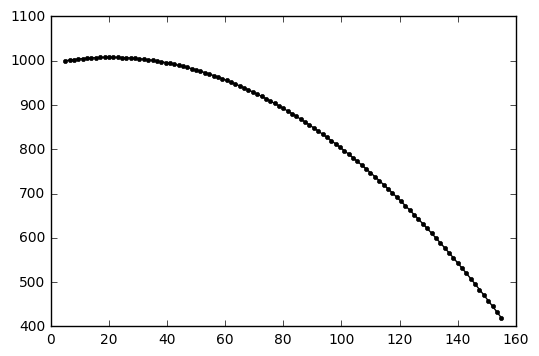

In [31]:
# Visualise the guess
import matplotlib.pyplot as plt
tf, cnode, state, cmid = Problem.Decode(zguess)
plt.plot(state[:,0], state[:,1], 'k.-')
plt.show()

In [32]:
# Use PyGMO to optimise with the ballistic guess
from PyGMO import *
pop = population(Problem)
pop.push_back(zguess)
print pop

Problem name: <class 'Optimisation.Runge_Kutta'>
	Global dimension:			1109
	Integer dimension:			0
	Fitness dimension:			1
	Constraints dimension:			509
	Inequality constraints dimension:	0
	Lower bounds: [1, -1000, 0, -500, -500,  ... ]
	Upper bounds: [200, 1000, 2000, 500, 500,  ... ]
	Constraints tolerance: [1e-08, 1e-08, 1e-08, 1e-08, 1e-08,  ... ]

Number of individuals: 1

List of individuals:
#0:
	Decision vector:		[30, 5, 1000, 5, 5,  ... ]
	Velocity vector:		[-63.707980607341398, 921.85443641383813, -255.08445339923469, -80.528841114691829, 25.310257276306174,  ... ]
	Constraint vector:		[0, 0, 0, 0, 0,  ... ]
	Fitness vector:			[-9900]
	Best decision vector:		[30, 5, 1000, 5, 5,  ... ]
	Best constraint vector:		[0, 0, 0, 0, 0,  ... ]
	Best fitness vector:		[-9900]
	Dominates:			[]
	Is dominated by:		0	individuals
Champion:
	Decision vector:	[30, 5, 1000, 5, 5,  ... ]
	Constraints vector:	[0, 0, 0, 0, 0,  ... ]
	Fitness vector:		[-9900]




In [33]:
# Use a gradient based local optimiser with monotonic basin hopping
algo = algorithm.scipy_slsqp(max_iter=4000, screen_output=True)
algo = algorithm.mbh(algo, screen_output=True, stop=2)

In [ ]:
# Evolve the ballistic trajectory into an optimal landing
pop = algo.evolve(pop)

  NIT    FC           OBJFUN            GNORM


In [20]:
tf, cb, state, c = Problem.Decode(pop.champion.x)

In [23]:
plt.plot(state[:,0], state[:,1], 'k.-')

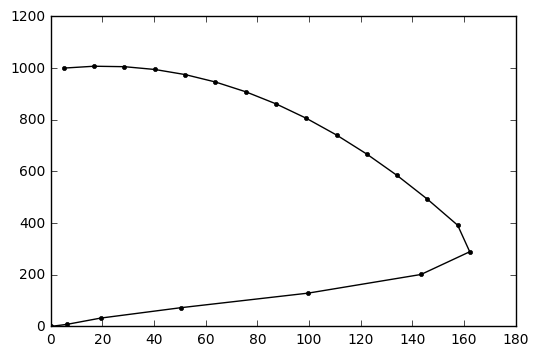

In [24]:
plt.show()